In [1]:
from PIL import Image
import numpy as np

def create_image_grid(input_image_path, grid_size, overlap_ratio=0.5):
    """
    Create a grid of overlapping images from an input image.

    Args:
        input_image_path (str): Path to the input image.
        grid_size (int): Number of images in the grid horizontally and vertically.
        overlap_ratio (float): Ratio of overlap between adjacent images (between 0 and 1).

    Returns:
        list: A list of PIL Image objects representing the overlapping image grid.
    """
    # Load the input image
    input_image = Image.open(input_image_path)
    width, height = input_image.size

    # Calculate the size of each grid image
    grid_image_width = width // grid_size
    grid_image_height = height // grid_size

    # Calculate the overlap size
    overlap_width = int(grid_image_width * overlap_ratio)
    overlap_height = int(grid_image_height * overlap_ratio)

    # Create a list to store the grid images
    grid_images = []

    # Iterate over the grid and extract overlapping images
    for row in range(grid_size):
        for col in range(grid_size):
            left = col * grid_image_width - overlap_width
            right = left + grid_image_width + overlap_width
            top = row * grid_image_height - overlap_height
            bottom = top + grid_image_height + overlap_height

            # Crop the input image to get the grid image
            grid_image = input_image.crop((left, top, right, bottom))
            grid_images.append(grid_image)

    return grid_images

# Example usage
input_image_path = "data/left.jpg"
grid_size = 3
overlap_ratio = 0.3

grid_images = create_image_grid(input_image_path, grid_size, overlap_ratio)

# Save the grid images
for i, image in enumerate(grid_images):
    image.save(f"outputs/grid_image_{i}.jpg")

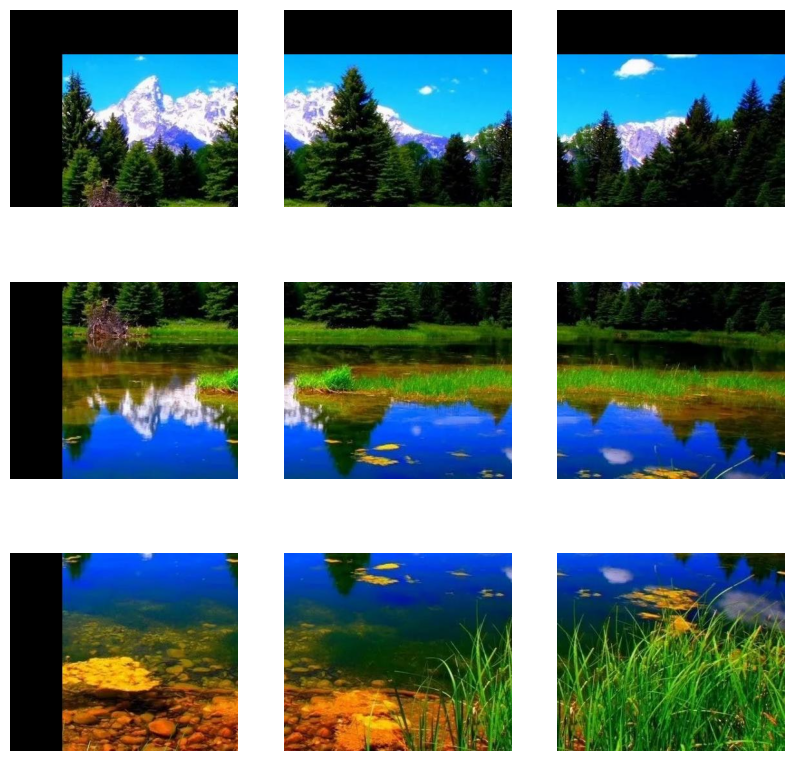

In [4]:
import matplotlib.pyplot as plt
import os

# Assuming images is a list of your 9 images
images = []
for filename in os.listdir('outputs'):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Add or modify to suit your image file types
        img = Image.open(os.path.join('outputs', filename))
        images.append(img)

fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(images[i])
    ax.axis('off')

plt.show()